In [2]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.
import joblib
import pandas as pd
import os
from src.constants import *

In [3]:
df = joblib.load(os.path.join(DATA_PATH,"All_Tweets_cleaned.joblib")).copy()

In [4]:
df["count"] =1

In [5]:
df

,Updated,Longitude,Latitude,count
0,2020-01-10,-118.411907,34.020789,1
1,2020-01-10,-0.088161,51.489263,1
2,2020-01-10,121.298157,14.140268,1
3,2020-01-10,-77.604684,41.117937,1
4,2020-01-10,121.031310,14.407883,1
...,...,...,...,...
97194,2020-02-04,116.433105,40.151588,1
97195,2020-02-04,103.000000,35.000000,1
97196,2020-02-04,-112.047290,33.068250,1
97197,2020-02-04,116.520996,40.017098,1


In [6]:
df = df[(df.Longitude >= 6)&(df.Longitude <= 11)& (df.Latitude >= 45.5)& (df.Latitude <= 48)]


In [7]:
df_time = pd.DataFrame(df["Updated"])
df_time["count"] = 1


In [8]:
df_counts = df_time[["count", "Updated"]].groupby(by="Updated").sum()

In [9]:
df_counts = df_counts/(df_counts.max())
df_counts = df_counts.rolling(7).mean().dropna()

In [10]:
df_counts = df_counts*10

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='Updated'>

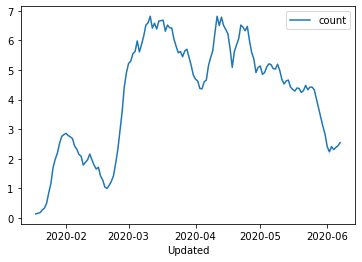

In [12]:
sns.lineplot(data=df_counts)

In [13]:
df = joblib.dump(df_counts, os.path.join(DATA_PATH,"Twitter_Scare_Score.joblib")).copy()